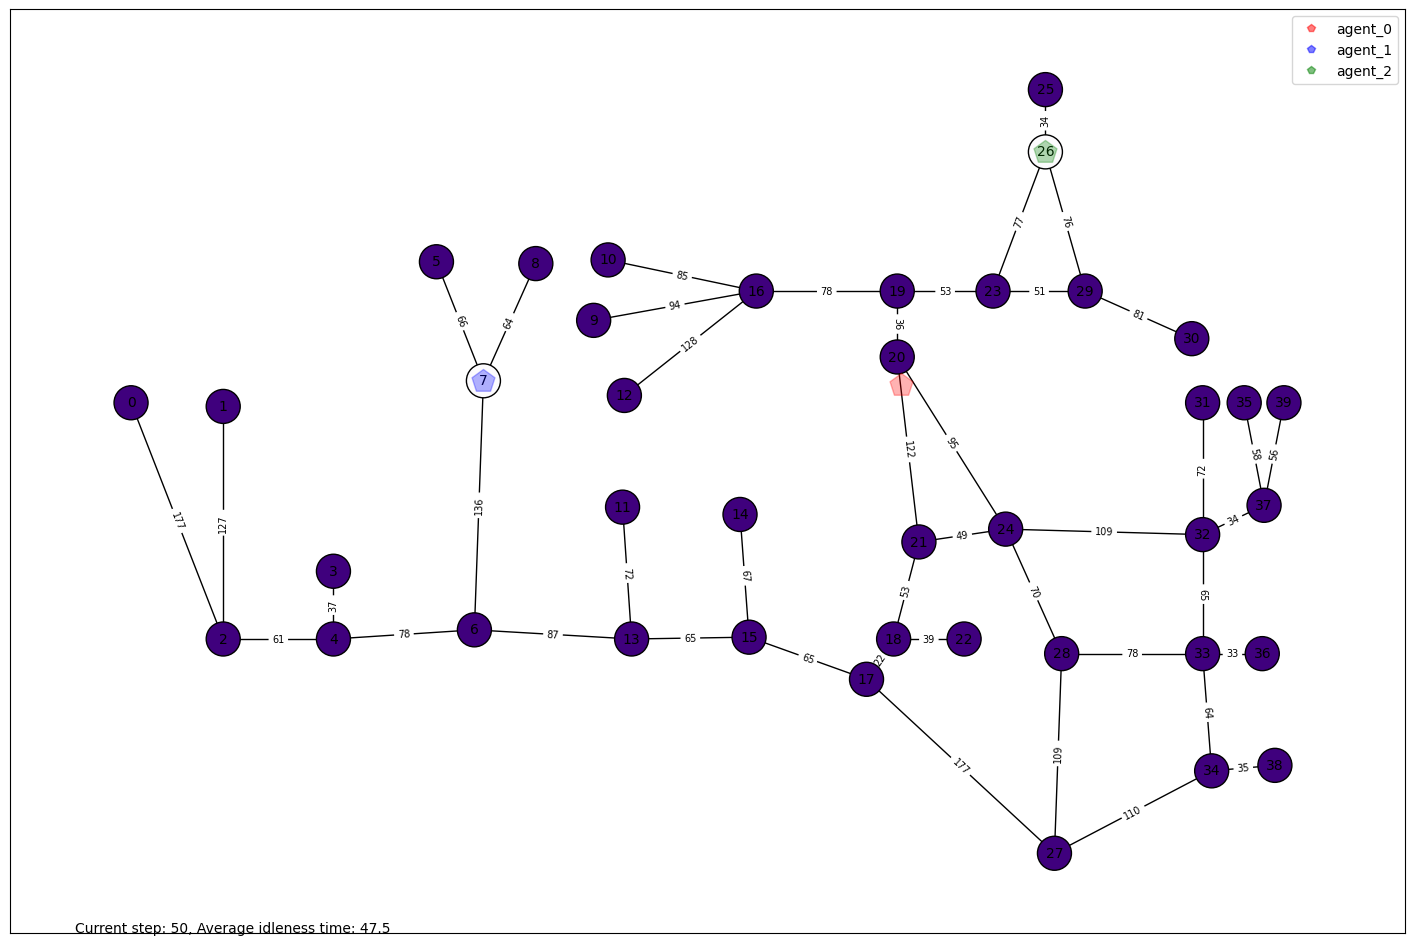

In [45]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.env.patrolling_zoo import PatrollingZooEnvironment
from patrolling_zoo.env.patrol_graph import PatrolGraph

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = PatrollingZooEnvironment(patrolGraph, 3,
                               require_explicit_visit=True)

observations = env.reset(seed=42)

# We temporarily fix the actions to a single node visit for each agent.
actions = {agent: env.action_space(agent).sample() for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    clear_output(wait=True)
    env.render()

    i += 1
    if i >= 50:
        break
env.close()

In [46]:
env.observe(env.agents[0])

{'agent_state': array([[34.26184248, 22.39824247],
        [16.95      , 22.575     ],
        [40.275     , 31.95      ]]),
 'vertex_state': array([50, 50, 50, 50, 50, 50, 50,  0, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 50, 50,  0, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50]),
 'vertex_distances': array([730, 680, 553, 529, 492, 616, 414, 550, 614, 208, 199, 399, 242,
        327, 329, 262, 114, 197, 175,  36,   0, 122, 214,  89,  95, 200,
        166, 274, 165, 140, 221, 276, 204, 243, 307, 296, 276, 238, 342,
        294])}